# Dimensionality Reduction

Banyak masalah Machine Learning melibatkan ribuan atau bahkan jutaan fitur untuk setiap contoh pelatihan. Tidak hanya semua fitur ini membuat proses pelatihan menjadi sangat lambat,
tetapi juga dapat membuatnya jauh lebih sulit untuk menemukan solusi yang baik, seperti yang akan kita lihat. Masalah
ini sering disebut sebagai kutukan dimensi. Beruntungnya, dalam masalah dunia nyata, seringkali mungkin untuk mengurangi jumlah fitur secara signifikan, mengubah masalah yang tidak dapat dipecahkan menjadi masalah yang dapat dipecahkan. Misalnya,
pertimbangkan gambar MNIST : piksel di tepi gambar hampir selalu putih, jadi Anda dapat menghapus piksel-piksel ini dari set pelatihan tanpa kehilangan banyak informasi. 

Selain mempercepat pelatihan, pengurangan dimensi juga sangat berguna untuk visualisasi data (atau DataViz). Mengurangi jumlah dimensi menjadi dua (atau tiga) memungkinkan kita untuk menggambar tampilan ringkas dari kumpulan data berdimensi tinggi pada grafik dan seringkali memperoleh wawasan penting dengan mendeteksi pola secara visual, seperti kluster. Selain itu, DataViz sangat penting untuk menyampaikan kesimpulan Anda kepada orang-orang yang bukan ilmuwan data—terutama pengambil keputusan yang akan menggunakan hasil anda.

## Setup

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [1]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## The Curse of Dimensionality

Kita begitu terbiasa hidup dalam tiga dimensi1 sehingga intuisi kita gagal saat mencoba membayangkan ruang berdimensi tinggi. Bahkan kubus hiper 4D yang sederhana pun sangat sulit untuk dibayangkan dalam pikiran kita, apalagi elipsoid berdimensi 200 yang melengkung dalam ruang berdimensi 1.000. Ternyata banyak hal berperilaku sangat berbeda dalam ruang berdimensi tinggi. Misalnya,
jika Anda memilih titik acak dalam persegi satuan (persegi 1 × 1), titik tersebut hanya memiliki peluang sekitar 0,4% untuk berada kurang dari 0,001 dari batas (dengan kata lain, sangat kecil kemungkinan suatu titik acak akan "ekstrem" di sepanjang dimensi apa pun). Namun, dalam hiperkubus satuan 10.000 dimensi, probabilitas ini lebih besar dari 99,999999%. Titik-titik
posting dalam hiperkubus berdimensi tinggi berada sangat dekat dengan batas. Berikut adalah perbedaan yang lebih merepotkan: jika Anda memilih dua titik secara acak dalam persegi satuan, jarak antara kedua titik ini akan, rata-rata, sekitar 0,52.  Jika Anda memilih dua titik acak dalam kubus 3D satuan, jarak rata-ratanya akan menjadi sekitar 0,66. Tapi bagaimana dengan dua titik yang dipilih secara acak dalam kubus hiperdimensi 1.000.000?
Jarak rata-rata, percaya atau tidak, akan sekitar 408,25 (kira-kira 1.000.000/6)! Ini bertentangan dengan intuisi: bagaimana dua titik bisa begitu jauh padahal keduanya terletak di dalam kubus hiper satuan yang sama?  Nah, ada banyak sekali ruang dalam dimensi tinggi. Akibatnya, kumpulan data berdimensi tinggi berisiko menjadi sangat jarang: sebagian besar contoh pelatihan kemungkinan besar saling berjauhan. Ini juga berarti bahwa instans baru kemungkinan akan jauh dari instans pelatihan mana pun, membuat prediksi jauh lebih tidak dapat diandalkan daripada dalam dimensi yang lebih rendah, karena akan didasarkan pada ekstrapolasi yang jauh lebih besar. Singkatnya, semakin banyak dimensi yang dimiliki himpunan pelatihan, semakin besar pula risiko kelebihan pas. Secara teori, salah satu solusi untuk kutukan dimensionalitas adalah dengan meningkatkan ukuran himpunan pelatihan untuk mencapai kepadatan instans pelatihan yang memadai.  Sayangnya, dalam praktiknya, jumlah contoh pelatihan yang diperlukan untuk mencapai kepadatan tertentu tumbuh secara eksponensial dengan jumlah dimensi.  Dengan hanya 100 fitur (jauh lebih sedikit daripada dalam masalah MNIST), Anda akan membutuhkan lebih banyak contoh pelatihan daripada jumlah atom di alam semesta yang dapat diamati agar contoh pelatihan berada dalam jarak 0,1 satu sama lain rata-rata, dengan asumsi mereka tersebar merata di semua dimensi.

## Main Approaches for Dimensionality Reduction

Ada dua pendekatan utama untuk mengurangi dimensi: Projection dan Manifold Learning.

## Projection

Dalam sebagian besar masalah dunia nyata, contoh pelatihan tidak tersebar merata di semua dimensi. Banyak fitur yang hampir konstan, sementara yang lain sangat berkorelasi (seperti yang dibahas sebelumnya untuk MNIST). Akibatnya, semua contoh pelatihan terletak di dalam (atau dekat dengan) subruang berdimensi jauh lebih rendah dari ruang berdimensi tinggi. Ini terdengar sangat abstrak, jadi mari kita lihat contohnya. 

## Manifold Learning

Swiss roll adalah contoh dari manifold 2D. Sederhananya, manifold 2D adalah bentuk 2D yang dapat ditekuk dan dipelintir dalam ruang berdimensi lebih tinggi.  Secara lebih umum, manifold d-dimensi adalah bagian dari ruang n-dimensi (dengan d < n) yang secara lokal menyerupai bidang hiper d-dimensi. Dalam kasus Swiss roll, d = 2 dan n = 3: secara lokal menyerupai bidang 2D, tetapi digulung dalam dimensi ketiga. Banyak algoritma reduksi dimensi bekerja dengan memodelkan manifold tempat instans pelatihan berada; ini disebut Pembelajaran Manifold. Ini bergantung pada asumsi banyak lipatan, juga disebut hipotesis banyak lipatan, yang menyatakan bahwa sebagian besar kumpulan data berdimensi tinggi dunia nyata terletak dekat dengan banyak lipatan berdimensi jauh lebih rendah. Asumsi ini sangat sering diamati secara empiris. Sekali lagi, pikirkan tentang dataset MNIST: semua gambar digit tulisan tangan memiliki beberapa kesamaan. Mereka terbuat dari garis-garis yang saling terhubung, tepinya berwarna putih, dan kurang lebih berada di tengah. Jika Anda menghasilkan gambar secara acak, hanya sebagian kecil yang konyol yang akan terlihat seperti angka tulisan tangan. Dengan kata lain, derajat kebebasan yang tersedia bagi Anda jika mencoba membuat gambar digit jauh lebih rendah daripada derajat kebebasan yang akan Anda miliki jika diizinkan menghasilkan gambar apa pun yang Anda inginkan. Batasan-batasan ini cenderung memampatkan kumpulan data menjadi manifold berdimensi lebih rendah. Asumsi banyak lipatan sering kali disertai dengan asumsi implisit lainnya: bahwa tugas yang ada (misalnya, klasifikasi atau regresi) akan lebih sederhana jika dinyatakan dalam ruang dimensi yang lebih rendah dari lipatan tersebut. 

## PCA

Analisis Komponen Utama (PCA) jauh lebih populer sebagai algoritma pengurangan dimensi. Pertama, ia mengidentifikasi bidang hiper yang terletak paling dekat dengan data, lalu memproyeksikan data ke bidang tersebut.

In [3]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

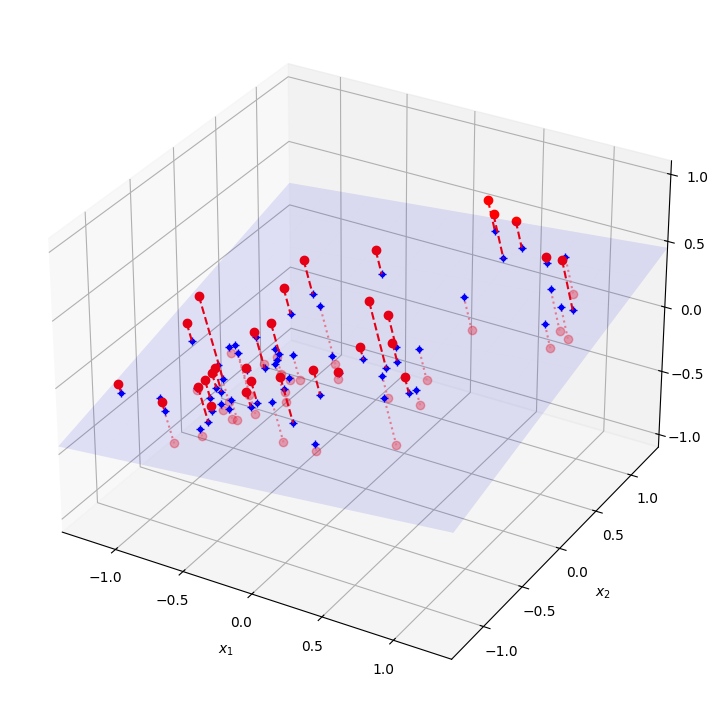

In [4]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# plot samples and projection lines below plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

save_fig("dataset_3d_plot", tight_layout=False)
plt.show()

### Preserving the Variance

Sebelum Anda dapat memproyeksikan himpunan pelatihan ke bidang hiper datar berdimensi lebih rendah, Anda harus memilih bidang hiper datar yang tepat terlebih dahulu.  Misalnya, kumpulan data 2D sederhana diwakili di sebelah kiri pada Gambar 8-7, bersama dengan tiga sumbu berbeda (yaitu, bidang hiper 1D). Di sebelah kanan adalah hasil proyeksi dataset pada setiap sumbu ini.  Seperti yang Anda lihat, proyeksi pada garis padat mempertahankan varians maksimum, sedangkan proyeksi pada garis putus-putus mempertahankan sangat sedikit varians dan proyeksi pada garis putus-putus mempertahankan jumlah varians yang sedang.